In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


# Exploration and Analysation of the Data

# loading the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
sleep_data = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

# understanding the data

In [4]:
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
sleep_data.shape

(374, 13)

In [6]:
sleep_data.size

4862

In [7]:
sleep_data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [8]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
sleep_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# exploring variables and relationships

In [10]:
for column in sleep_data.columns:
    sleep_data[column].value_counts()

In [11]:
sleep_data.corr()

/tmp/ipykernel_32/456255150.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sleep_data.corr()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


/tmp/ipykernel_32/2811445069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(sleep_data.corr(), annot=True)


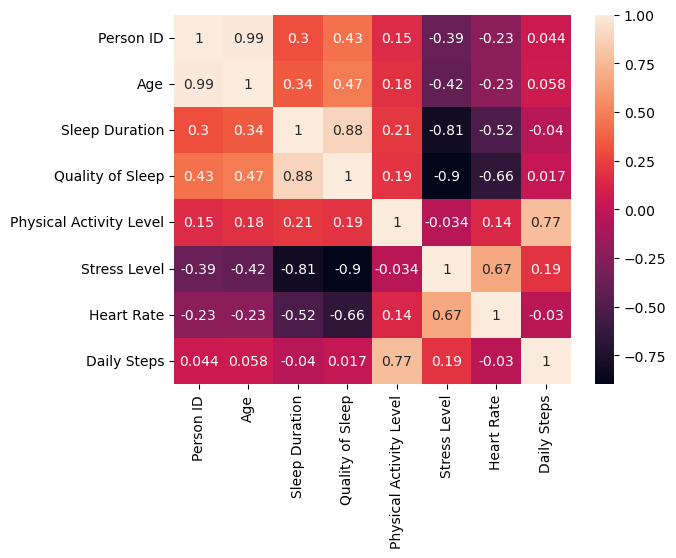

In [12]:
ax = sns.heatmap(sleep_data.corr(), annot=True)

# visualisation of data

In [13]:
import seaborn as sns



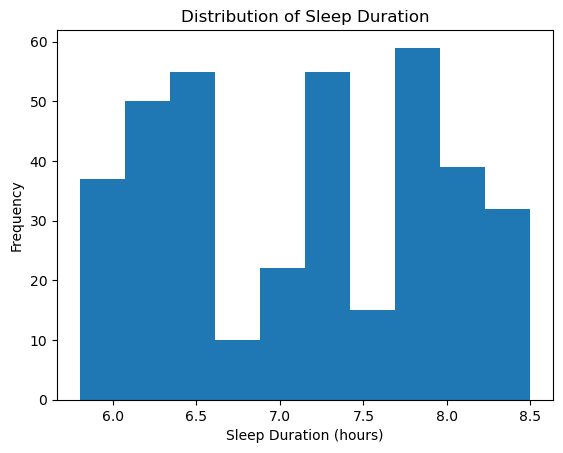

In [14]:
plt.hist(sleep_data['Sleep Duration'], bins=10)
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Duration')
plt.show()

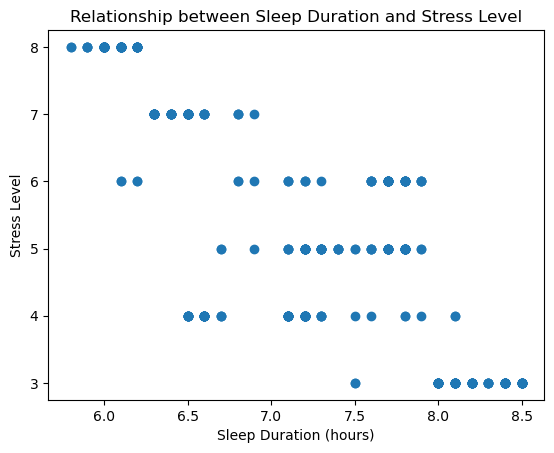

In [15]:
plt.scatter(sleep_data['Sleep Duration'], sleep_data['Stress Level'])
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.title('Relationship between Sleep Duration and Stress Level')
plt.show()

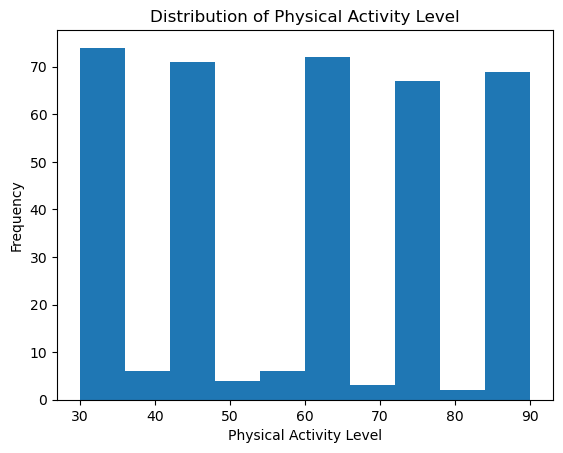

In [16]:
plt.hist(sleep_data['Physical Activity Level'], bins=10)
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.title('Distribution of Physical Activity Level')
plt.show()

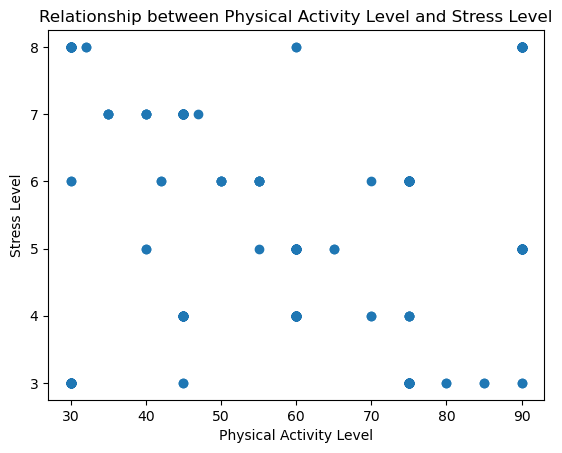

In [17]:
plt.scatter(sleep_data['Physical Activity Level'], sleep_data['Stress Level'])
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.title('Relationship between Physical Activity Level and Stress Level')
plt.show()

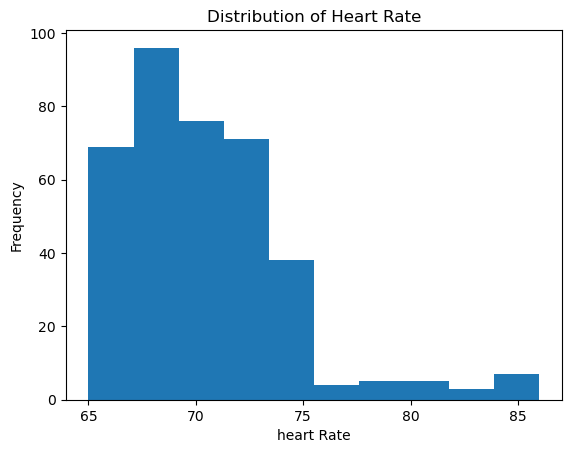

In [18]:
plt.hist(sleep_data['Heart Rate'], bins=10)
plt.xlabel('heart Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Rate')
plt.show()

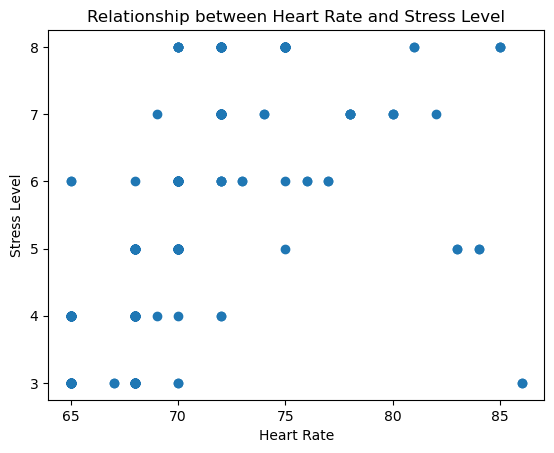

In [19]:
plt.scatter(sleep_data['Heart Rate'], sleep_data['Stress Level'])
plt.xlabel('Heart Rate')
plt.ylabel('Stress Level')
plt.title('Relationship between Heart Rate and Stress Level')
plt.show()

# Data Preprocessing and Cleaning

# checking for missing values

In [20]:
sleep_data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [21]:
sleep_data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

**here all are null values no need to deal with null values**

**Encoding categorical variables**

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

**Selecting Categorical Variables**

In [23]:
categorical_cols = ['Gender', 'Occupation', 'Stress Level']

**Encoding Categorical Variables**

In [24]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    sleep_data[col] = label_encoder.fit_transform(sleep_data[col])

**Feature Scaling**

**Selecting Features for Scaling**

In [25]:
numerical_cols = ['Sleep Duration', 'Physical Activity Level']

**Performing Feature Scaling**

In [26]:
scaler = StandardScaler()
sleep_data[numerical_cols] = scaler.fit_transform(sleep_data[numerical_cols])

# Feature Engineering

**dropping irrelevant features**

In [27]:
sleep_data=sleep_data.drop(['Gender','Occupation','BMI Category','Blood Pressure','Sleep Disorder'],axis=1)

# Model Selection and Training

**Classification Model Selection**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import precision_score, recall_score, f1_score



/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

**Splitting the Data into Training and Testing Sets**

In [29]:
X = sleep_data.drop('Quality of Sleep', axis=1)  # Features
y = sleep_data['Quality of Sleep']  # Target 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**here we are not only intrested in traing a model but also we perform model performance evaluation using predictions and evaluation metricslike accuracy, precision,recall and f1-score etc.**

**Training the Logistic Regression Model**

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred = logreg.predict(X_test)

In [33]:
from sklearn import metrics

In [34]:
logreg_acc=metrics.accuracy_score(y_test, y_pred)

In [35]:
logreg_acc

0.6266666666666667

In [36]:
logreg_precision =metrics.precision_score(y_test, y_pred,average='micro')


In [37]:
logreg_precision

0.6266666666666667

In [38]:
logreg_recall = metrics.recall_score(y_test, y_pred,average='micro')

In [39]:
logreg_recall

0.6266666666666667

In [40]:
logreg_f1 =metrics. f1_score(y_test, y_pred,average='micro')

In [41]:
logreg_f1

0.6266666666666667

**Training the Random Forest Model**

In [42]:
rf = RandomForestClassifier()


rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_rf = rf.predict(X_test)

In [44]:
from sklearn import metrics

In [45]:
rf_acc=metrics.accuracy_score(y_test, y_pred_rf)

In [46]:
rf_acc

0.9733333333333334

In [47]:
rf_precision=metrics.precision_score(y_test, y_pred_rf,average='micro')

In [48]:
rf_precision

0.9733333333333334

In [49]:
rf_recall=metrics.recall_score(y_test, y_pred_rf,average='micro')

In [50]:
rf_recall

0.9733333333333334

In [51]:
rf_f1=metrics.f1_score(y_test, y_pred_rf,average='micro')

In [52]:
rf_f1

0.9733333333333334

**Training the LSTM Model**

In [53]:
# Reshape the input data for LSTM (assuming a 3D tensor input shape)
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create an instance of the LSTM model
lstm = Sequential()

# Add LSTM layer and a dense output layer
lstm.add(LSTM(64, input_shape=(1, X_train.shape[1])))
lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history=lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32)

Epoch 1/20
10/10 [==============================] - 2s 4ms/step - loss: -4.0818 - accuracy: 0.0000e+00
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: -5.5009 - accuracy: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: -6.4255 - accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: -7.3451 - accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: -8.2606 - accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: -9.1729 - accuracy: 0.0000e+00
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: -10.0806 - accuracy: 0.0000e+00
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: -10.9833 - accuracy: 0.0000e+00
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: -11.8803 - accuracy: 0.0000e+00
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - los

In [54]:
X_test_array = X_test.values

In [55]:
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])

In [56]:
# Evaluate LSTM model
lstm_loss, lstm_acc = lstm.evaluate(X_test_reshaped, y_test)

3/3 [==============================] - 0s 3ms/step - loss: -21.2231 - accuracy: 0.0000e+00


In [57]:
lstm_acc

0.0

# Plotting Accuracy and Loss Curves

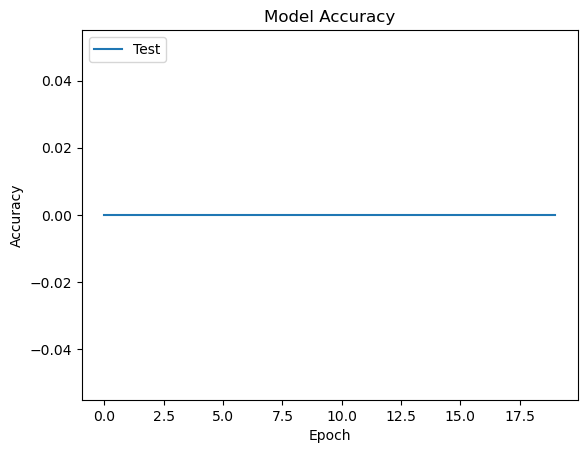

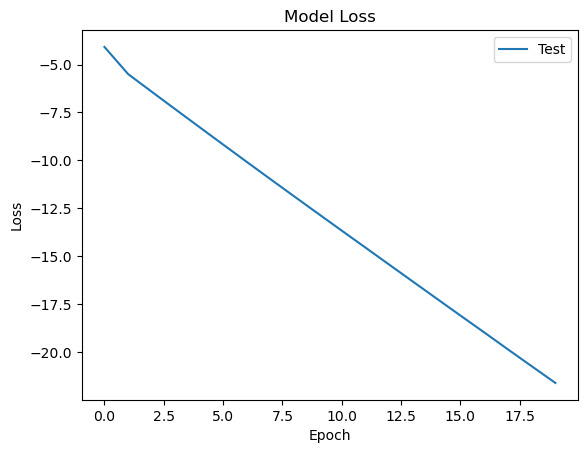

In [58]:
# Plotting accuracy and loss curves
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test'], loc='upper right')
plt.show()

# analysis of predictions

**confusion matrix**

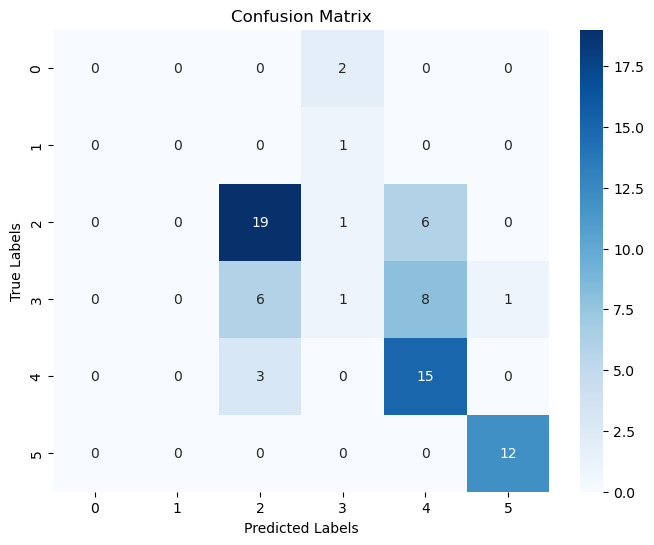

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

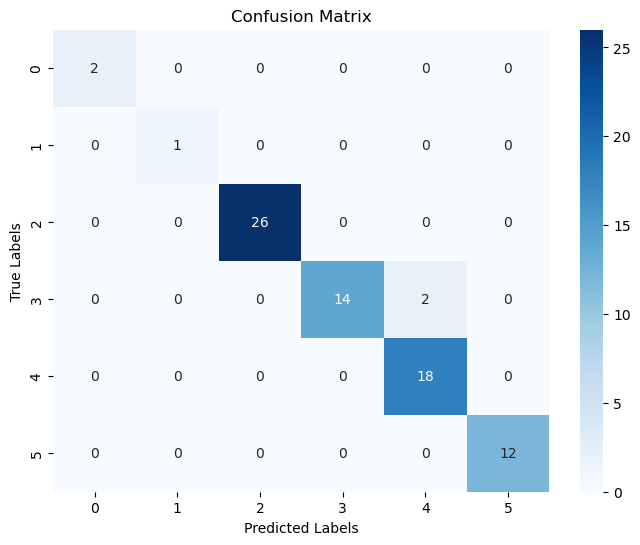

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**Classification report**

In [61]:
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.68      0.73      0.70        26
           7       0.20      0.06      0.10        16
           8       0.52      0.83      0.64        18
           9       0.92      1.00      0.96        12

    accuracy                           0.63        75
   macro avg       0.39      0.44      0.40        75
weighted avg       0.55      0.63      0.57        75



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plotting graphs of accuracies of logistic regression and random forest models

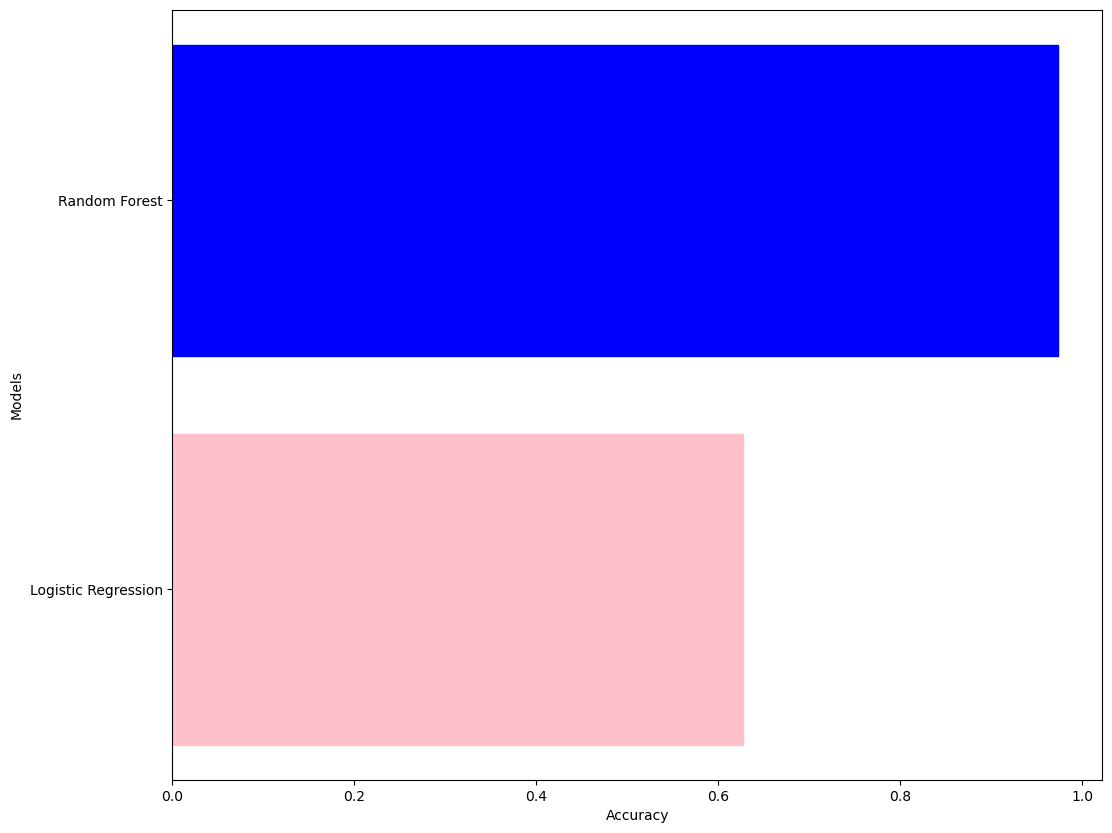

In [62]:
names=['Logistic Regression' , 'Random Forest' ]
acc=[logreg_acc,rf_acc]
plt.figure(figsize=(12,10))
graph = plt.barh(names,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('pink')
graph[1].set_color('blue')


# Plotting graphs of precisions of logistic regression and random forest models

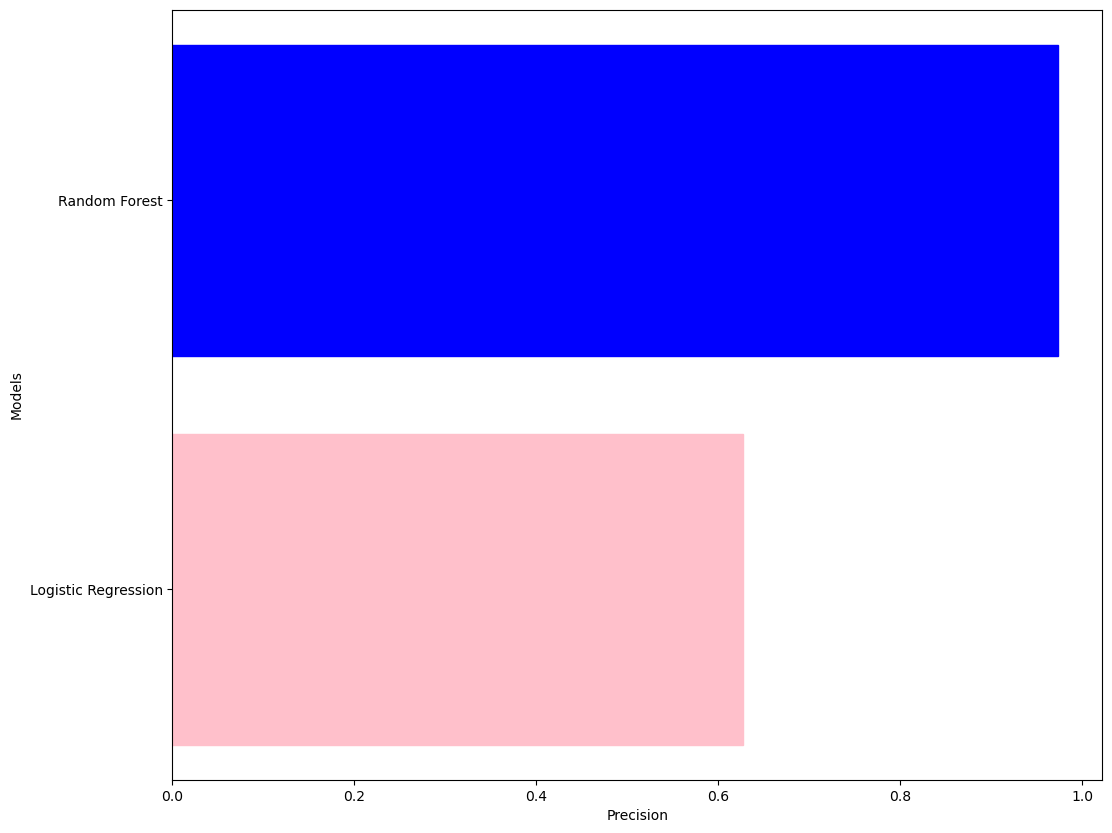

In [63]:
names=['Logistic Regression' , 'Random Forest' ]
precision=[logreg_precision,rf_precision]
plt.figure(figsize=(12,10))
graph = plt.barh(names,precision)
plt.xlabel('Precision')
plt.ylabel('Models')
graph[0].set_color('pink')
graph[1].set_color('blue')

# Plotting graphs of recall of logistic regression and random forest models

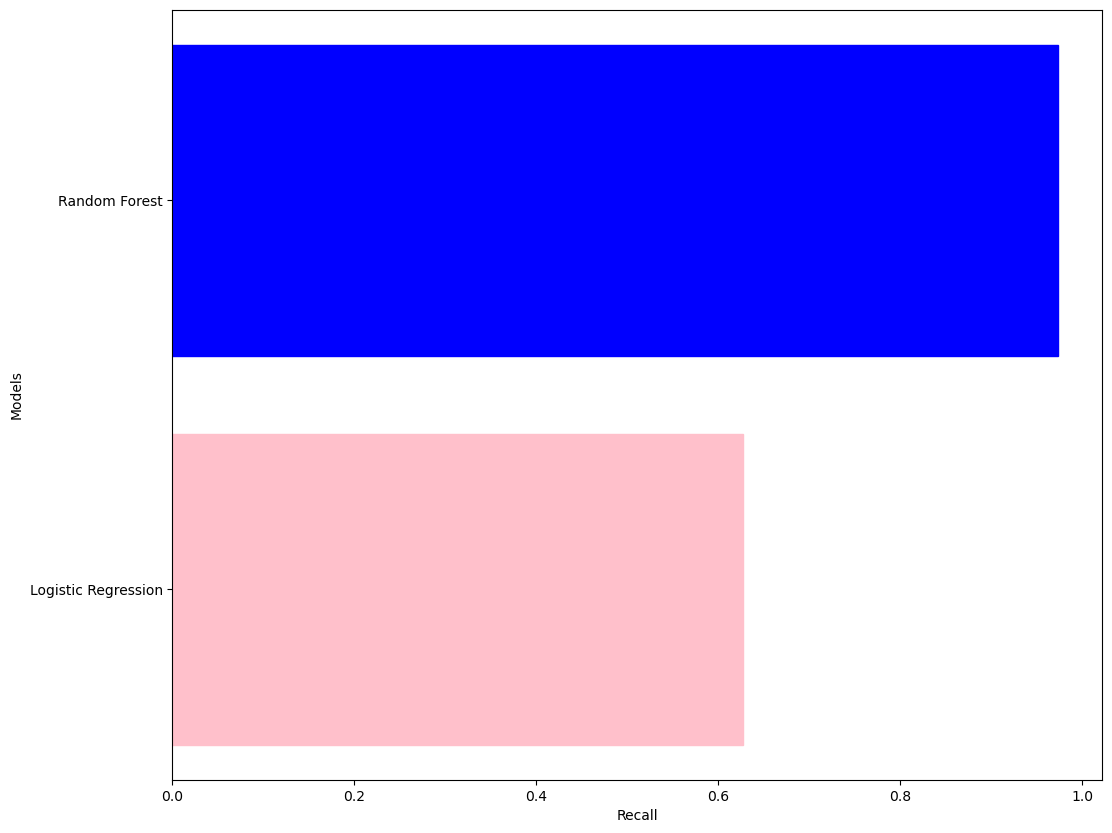

In [64]:
names=['Logistic Regression' , 'Random Forest' ]
recall=[logreg_recall,rf_recall]
plt.figure(figsize=(12,10))
graph = plt.barh(names,recall)
plt.xlabel('Recall')
plt.ylabel('Models')
graph[0].set_color('pink')
graph[1].set_color('blue')

# Plotting graphs of f1 of logistic regression and random forest models

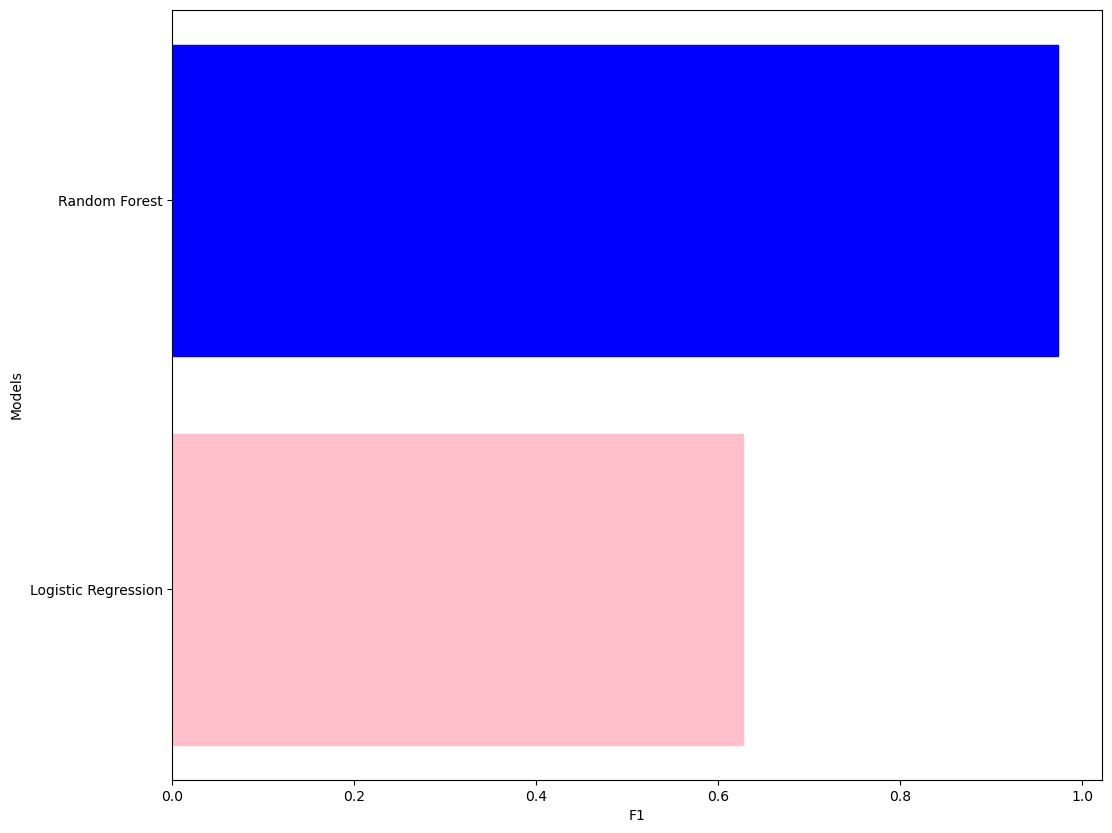

In [65]:
names=['Logistic Regression' , 'Random Forest' ]
f1=[logreg_f1,rf_f1]
plt.figure(figsize=(12,10))
graph = plt.barh(names,f1)
plt.xlabel('F1')
plt.ylabel('Models')
graph[0].set_color('pink')
graph[1].set_color('blue')

# Hyperparameter Tuning

**Here we define the Hyperparameter Space,set up Cross-Validation, perform Grid Search,analyze the Results,evaluate the Best Model**

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

**Logistic Regression**

In [67]:
param_grid = {
'C': [0.1, 1, 10],
'penalty': ['l2']
}
log = LogisticRegression(random_state=42, solver='liblinear')
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5,
n_jobs=-1)
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']})

In [68]:
GridSearchCV(cv=5,
estimator=LogisticRegression(random_state=42,
solver='liblinear'),
n_jobs=-1, param_grid={'C': [0.1, 1, 10], 'penalty':
['l2']})
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'penalty': 'l2'}
Best accuracy:  0.7789265536723164


In [69]:
y_pred_log_ht = grid_search.predict(X_test)

**Random Forest**

In [70]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,
n_jobs=-1)
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [71]:
GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
n_jobs=-1,
param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1],
'min_samples_split': [2, 5], 'n_estimators':
[50]})
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy:  0.9732768361581922


In [72]:
y_pred_rf_ht = grid_search.predict(X_test)

**Accuracies after  hyperparameter tuning**

In [73]:
log_reg_acc_ht=accuracy_score(y_test,y_pred_log_ht)


In [74]:
rf_acc_ht=accuracy_score(y_test,y_pred_rf_ht)

# Plotting graphs of accuracies of logistic regression and random forest models after hyperparameter tuning

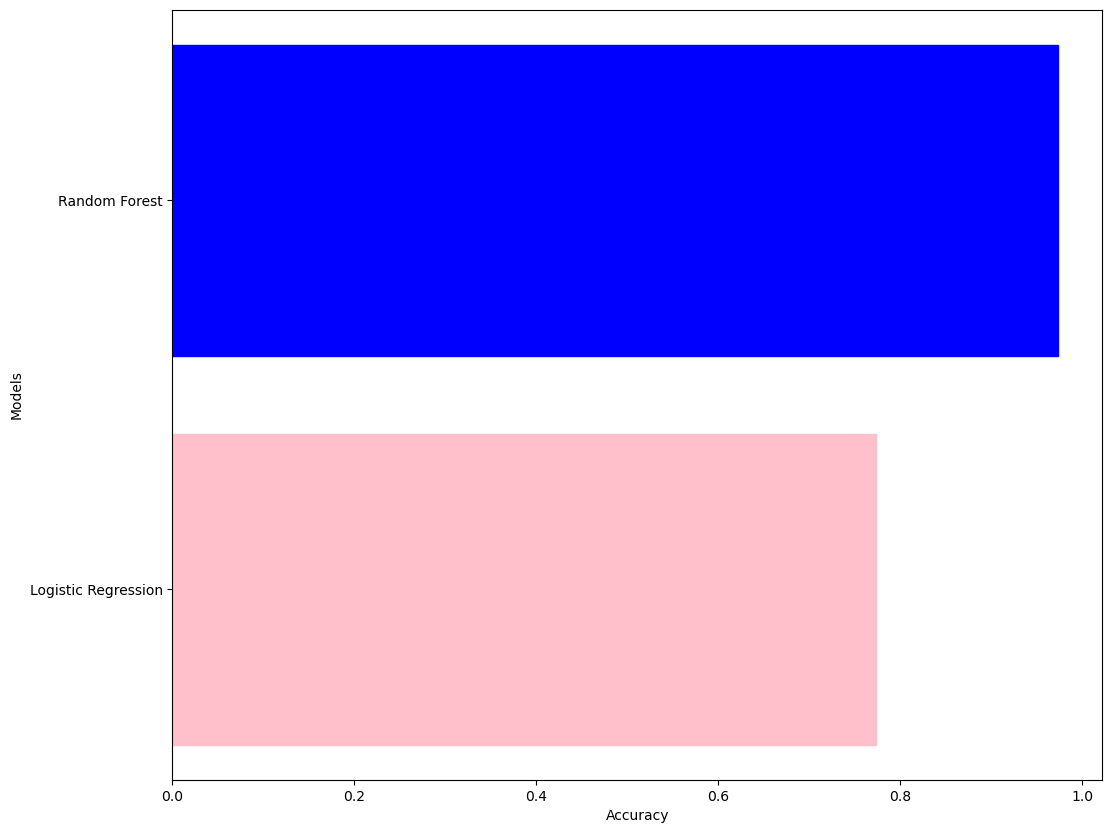

In [75]:
model=['Logistic Regression', 'Random Forest' ]
acc=[log_reg_acc_ht,rf_acc_ht]
plt.figure(figsize=(12,10))
graph = plt.barh(model,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('pink')
graph[1].set_color('blue')
#for i, v in enumerate(acc):
#plt.text(v, i, str(round(v, 2)), color='black', fontsize=12,
#va='center')
#plt.show()

# Sleep Pattern Analysis

# Sleep Pattern Extraction and Analysis

**Data Preparation**

In [78]:
import pandas as pd

# Load the sleep-related dataset
dataset = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

# Convert the date column to a time series format
#dataset['date'] = pd.to_datetime(dataset['date'])
#dataset.set_index('date', inplace=True)

**Exploratory Data Analysis (EDA)**

Sleep Duration Statistics:
count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64


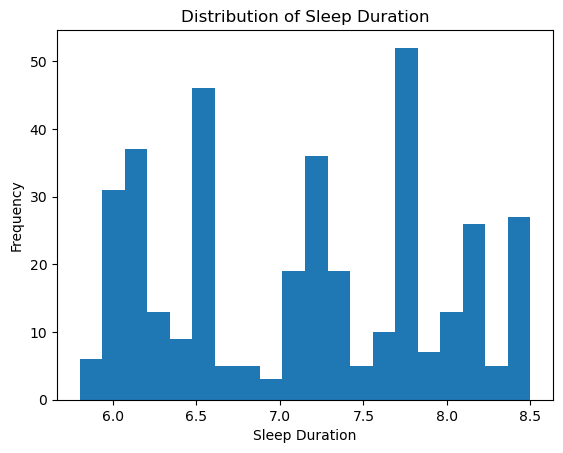

In [80]:
print('Sleep Duration Statistics:')
print(dataset['Sleep Duration'].describe())

# Visualize sleep duration distribution
import matplotlib.pyplot as plt

plt.hist(dataset['Sleep Duration'], bins=20)
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Duration')
plt.show()

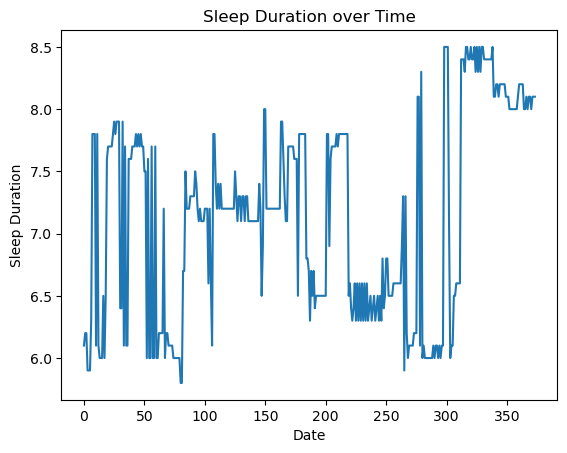

In [82]:
# Plot sleep duration over time
plt.plot(dataset.index, dataset['Sleep Duration'])
plt.xlabel('Date')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration over Time')
plt.show()

**Time Series Analysis**

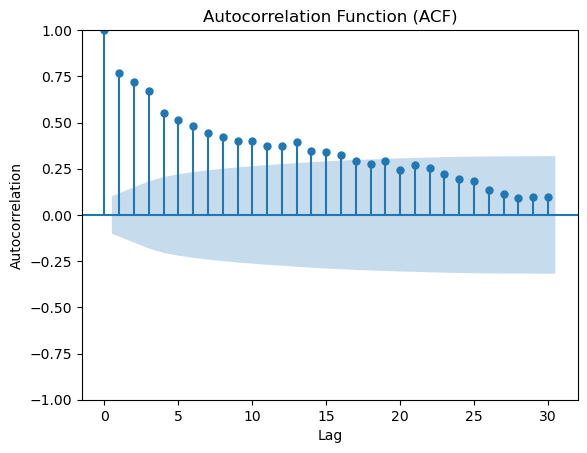

In [93]:
from statsmodels.graphics.tsaplots import plot_acf

# Perform autocorrelation analysis on the sleep duration time series
acf = plot_acf(dataset['Sleep Duration'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [87]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.2 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


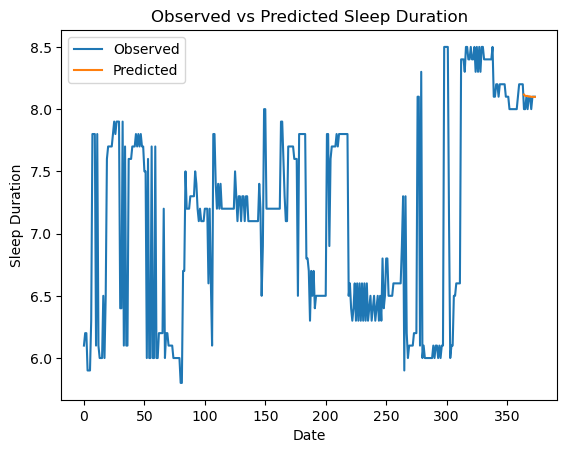

In [89]:
from pmdarima.arima import auto_arima

# Train an ARIMA model on the sleep duration time series
model = auto_arima(dataset['Sleep Duration'], seasonal=False)
model.fit(dataset['Sleep Duration'])

# Make predictions with the trained ARIMA model
predictions = model.predict(n_periods=10)

# Visualize the predicted sleep duration
plt.plot(dataset.index, dataset['Sleep Duration'], label='Observed')
plt.plot(dataset.index[-10:], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sleep Duration')
plt.title('Observed vs Predicted Sleep Duration')
plt.legend()
plt.show()

# Correlation and Pattern Identification

**Correlation Analysis**

/tmp/ipykernel_32/1502372107.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


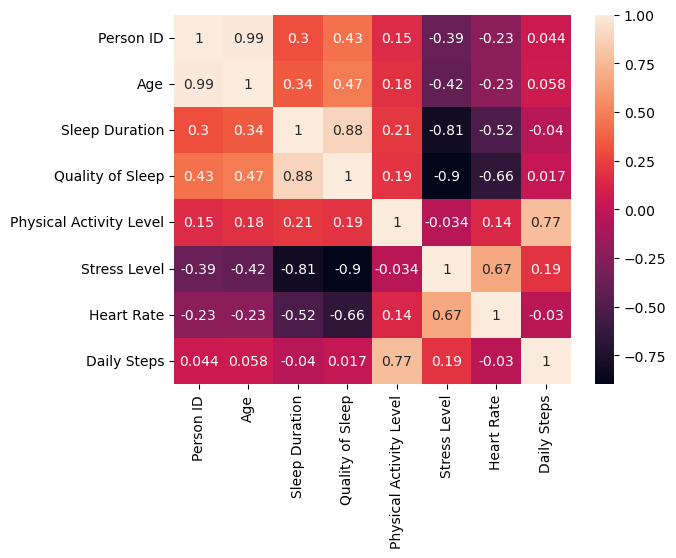

In [95]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = dataset.corr()

# Plot correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True)

# Identify features with high correlation to sleep quality
sleep_quality_corr = correlation_matrix['Quality of Sleep']
relevant_features = sleep_quality_corr[abs(sleep_quality_corr) > 0.5].index.tolist()

**Pattern Identification**

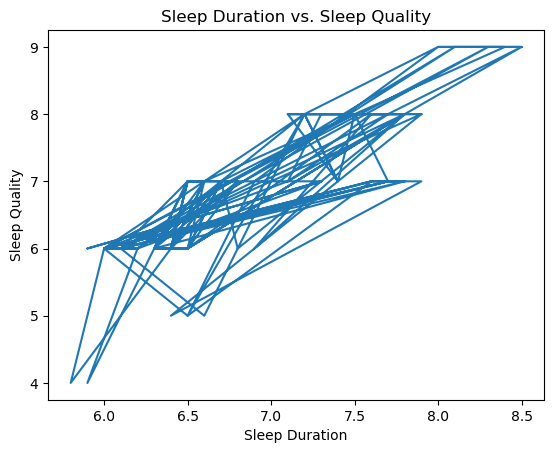

In [97]:
import matplotlib.pyplot as plt

# Visualize sleep duration and sleep quality
plt.plot(dataset['Sleep Duration'], dataset['Quality of Sleep'])
plt.xlabel('Sleep Duration')
plt.ylabel('Sleep Quality')
plt.title('Sleep Duration vs. Sleep Quality')
plt.show()



# Visualization and Reporting

**Creating Reports or Dashboards for Sleep Quality Predictions and User Feedback**

**Visualize Predicted Sleep Quality**

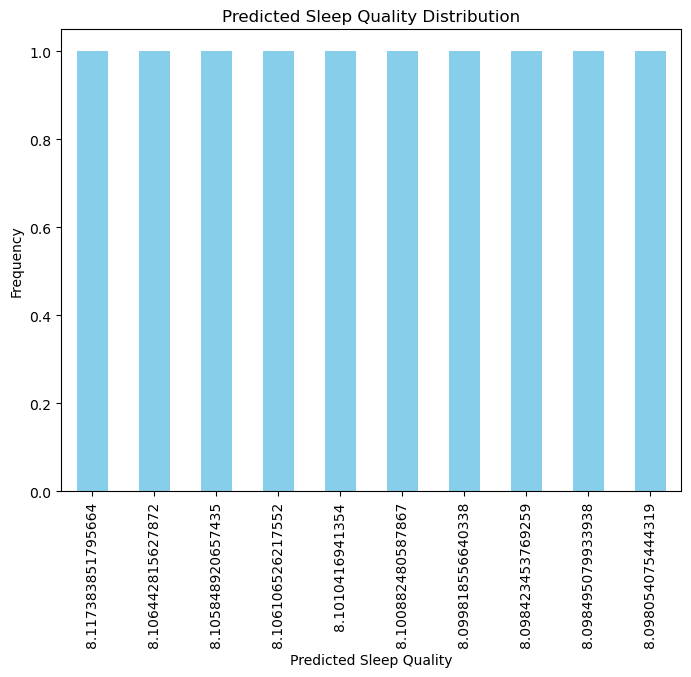

In [112]:




label_counts = pd.Series(predictions).value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Predicted Sleep Quality')
plt.ylabel('Frequency')
plt.title('Predicted Sleep Quality Distribution')
plt.show()

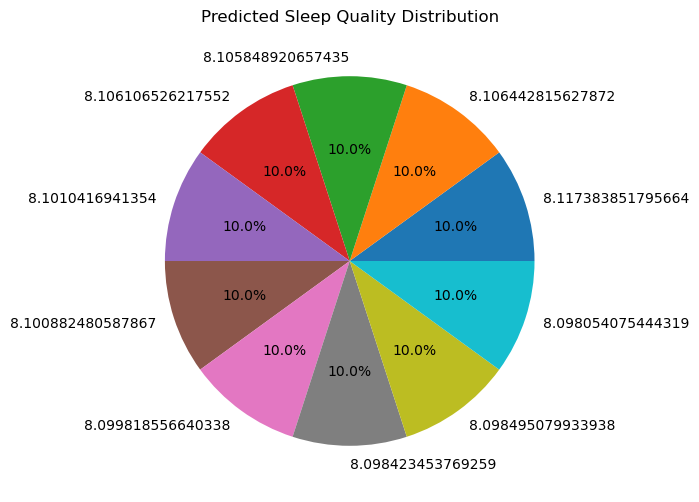

In [116]:
label_counts = pd.Series(predictions).value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title("Predicted Sleep Quality Distribution")
plt.show()

**Compare Predicted and Actual Sleep Quality**

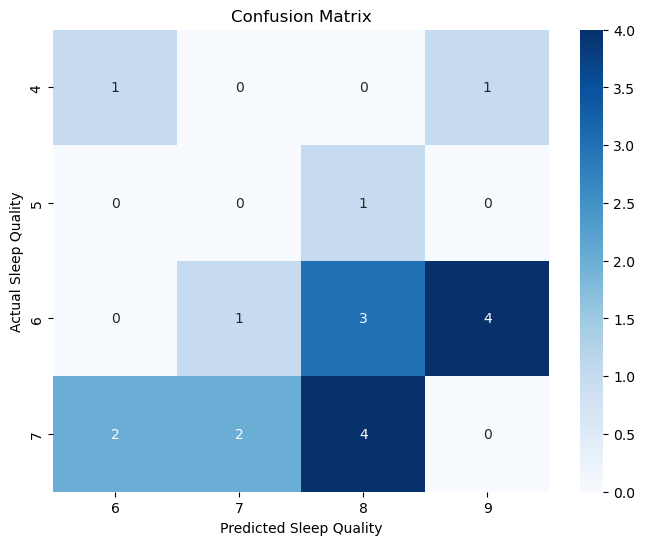

In [118]:
confusion_matrix = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Sleep Quality")
plt.ylabel("Actual Sleep Quality")
plt.title("Confusion Matrix")
plt.show()

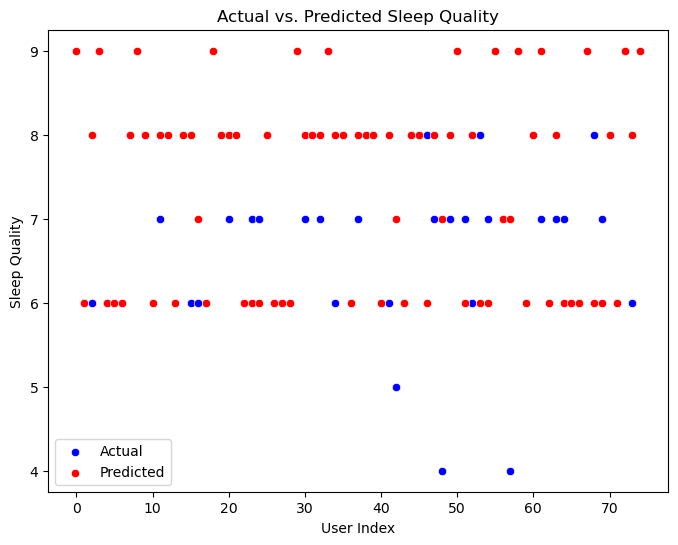

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test, color='blue', label='Actual')
sns.scatterplot(x=range(len(y_pred)), y=y_pred, color='red', label='Predicted')
plt.xlabel("User Index")
plt.ylabel("Sleep Quality")
plt.title("Actual vs. Predicted Sleep Quality")
plt.legend()
plt.show()

# Conclusion and Future Scope


**We can conclude that Random Forest works best for our dataset
after hyper parameter tuning. And, before also,We can conclude that 
Random Forest works best for our dataset**